In [161]:
%matplotlib inline
import numpy as np
import scipy
from scipy.signal import hilbert, chirp, spectrogram, periodogram
import matplotlib.pyplot as plt

# FM modulator

### Data signal

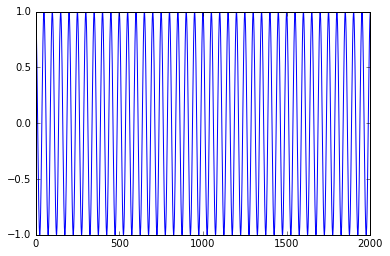

In [165]:
samp_rate = 1e3
time_end = 2
time = np.linspace(0, time_end, samp_rate*time_end, endpoint=False) # NB! NOTICE ENDPOINT TO MATCH GNURADIO

deviation = samp_rate/3
data_freq = 20

#data signal
#reference data form GNURADIO
gr_data = scipy.fromfile(open('data.32f'),dtype=scipy.float32)
data = np.cos(2*np.pi*data_freq*time)
plt.plot(data)
np.testing.assert_almost_equal(gr_data[:len(data)], data, decimal=4)

### Modulated signal

Sensitivity: 2.0943951023931953


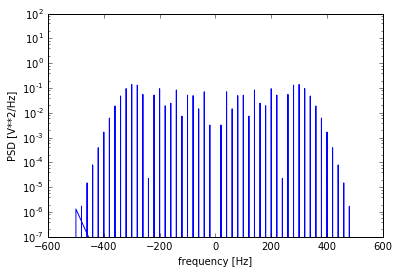

In [168]:
sensitivity = 2*np.pi*deviation/samp_rate
print('Sensitivity:', sensitivity)

d_phase = 0
phl = []

for ins in data:
    d_phase = d_phase + sensitivity * ins
    if d_phase > 2 * np.pi:
        d_phase -= 2*np.pi
    # keep in pi range
#     d_phase = ((d_phase + np.pi) % (2.0*np.pi)) - np.pi
    phl.append(d_phase*1j)
    
mod = np.exp(phl)
f, Pxx_den = periodogram(mod, samp_rate)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# reference GNURADIO samples
gr_fmmod = scipy.fromfile(open('mod_samples.32fc'),
                   dtype=scipy.complex64)
np.testing.assert_almost_equal(gr_fmmod[:len(mod)], mod, decimal=4)

# FM demodulator

Demodulator gain:  0.477464829275686


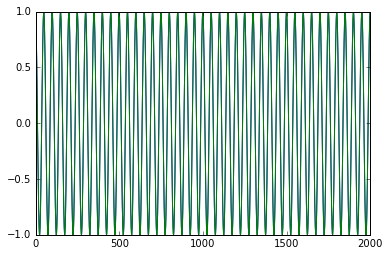

In [164]:
gain = samp_rate/(2*np.pi*deviation)
print('Demodulator gain: ', gain)

baseband = mod
demod_data = np.angle( baseband[1:] * np.conjugate(baseband[:-1]) )

demod_data *= gain
# %matplotlib inline
plt.plot(demod_data)
plt.plot(data[1:]) # NB!! for some reason had to trash first sample

np.testing.assert_almost_equal(demod_data, data[1:])